## Extreme Gradient Boosting with XGBoost

XGBoost uses a gradient boosting algorithm, which combines the predictions of multiple weak models (typically decision trees) to create a strong predictive model. It employs a technique called gradient boosting, where each new model is trained to correct the mistakes made by the previous models.

Some key features of XGBoost include:

- Regularization: XGBoost provides various regularization techniques to prevent overfitting and improve generalization.
- Parallelization: XGBoost supports parallel processing, making it faster and scalable.
- Handling missing values: XGBoost has built-in capabilities to handle missing values in the data.
- Cross-validation: XGBoost supports cross-validation to evaluate the performance of the model.
- Feature importance: XGBoost provides a feature importance score, which indicates the relative importance of each feature in the model.


### Simple XGB Example

```
# Import xgboost
import xgboost as xgb

# Create arrays for the features and the target: X, y
X, y = churn_data.iloc[:,:-1], churn_data.iloc[:,-1]

# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(n_estimators=10, objective='binary:logistic', seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.758200
```

Decision trees are a popular machine learning algorithm used for both classification and regression tasks. They work by recursively partitioning the data into subsets based on the most significant attribute(s) at each node. This process creates a tree-like structure where each internal node represents a decision based on a feature, each branch represents an outcome of that decision, and each leaf node represents the predicted target value or class label.

CART (Classification and Regression Trees) is a specific algorithm used to create decision trees. Here's how it works:

Splitting the Data: CART starts with the entire dataset at the root node. It then selects the best feature and a corresponding threshold to split the data into two subsets. The split is chosen to maximize the homogeneity of the target variable within each subset. For classification tasks, homogeneity is often measured using metrics like Gini impurity or entropy, whereas for regression tasks, it's based on the reduction in variance.

Recursive Partitioning: After the initial split, the algorithm repeats this process for each subset, creating child nodes. It continues this recursive partitioning until a stopping criterion is met. This criterion could be a maximum tree depth, a minimum number of samples in a leaf node, or other criteria that prevent overfitting.

Prediction: Once the tree is built, for a new data point, it traverses the tree from the root to a leaf node based on the features of the data point. For regression tasks, the predicted value is the average of the target values in the leaf node. For classification tasks, the predicted class is the majority class in the leaf node.

CART models have several advantages, including their interpretability, ability to handle both numerical and categorical data, and ease of visualization. However, they can be prone to overfitting, especially when the tree depth is not properly controlled. Techniques like pruning (removing branches of the tree that do not provide significant predictive power) can be used to mitigate overfitting.

### Simple DecisionTree example:
```
# Import the necessary modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the classifier: dt_clf_4
dt_clf_4 = DecisionTreeClassifier(max_depth=4)

# Fit the classifier to the training set
dt_clf_4.fit(X_train,y_train)

# Predict the labels of the test set: y_pred_4
y_pred_4 = dt_clf_4.predict(X_test)

# Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_pred_4==y_test))/y_test.shape[0]
print("accuracy:", accuracy)

accuracy: 0.9649122807017544
```

Weak learner: An ML model that is slightly better than chance, eg. Decision Tree with 51% accuracy.

Strong learner: Algorithm that can be tuned to achieve good performance.

DMatrix is a data structure used by XGBoost, a popular machine learning library. Cross-validation with DMatrix ensures consistent handling of data, optimizing XGBoost's performance and preventing data leakage during the evaluation process.

```
# Create arrays for the features and the target: X, y
X, y = churn_data.iloc[:,:-1], churn_data.iloc[:,-1]

# Create the DMatrix from X and y: churn_dmatrix
churn_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:logistic", "max_depth":3}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, 
                  nfold=3, num_boost_round=5, 
                  metrics="error", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))

   train-error-mean  train-error-std  test-error-mean  test-error-std
0             0.282            0.002            0.284       1.932e-03
1             0.270            0.002            0.272       1.932e-03
2             0.256            0.003            0.258       3.963e-03
3             0.251            0.002            0.254       3.827e-03
4             0.247            0.002            0.249       9.344e-04
0.751480015401492

```

Same example with AUC as the evaluation metric:

```
# Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, 
                  nfold=3, num_boost_round=5, 
                  metrics="auc", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0           0.769      1.544e-03          0.768         0.003
1           0.791      6.758e-03          0.789         0.007
2           0.816      3.900e-03          0.814         0.006
3           0.823      2.018e-03          0.822         0.004
4           0.828      7.694e-04          0.826         0.002
0.8261911413597645

```

### Objective Functions and Base Learners:

Objective functions define what the boosting algorithm is trying to optimize, while base learners are the individual models that are sequentially combined to improve the overall predictive power of the ensemble.

In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('datasets/ames_housing_trimmed_processed.csv')

X = df.iloc[:, :-1]
y = df.iloc[:,-1]

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(n_estimators=10,objective='reg:linear', seed=123)

# Fit the regressor to the training set
xg_reg.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(preds, y_test))
print("RMSE: %f" % (rmse))


[07:31:48] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 28106.463641


### Linear Base Learners Example:

In [2]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test =  xgb.DMatrix(data=X_test, label=y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear", "objective":"reg:linear"}

# Train the model: xg_reg
xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=5)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

[07:31:54] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 45055.890299


### Evaluating Model Quality:

In [3]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics='rmse', as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

[07:31:58] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[07:31:58] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[07:31:58] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[07:31:58] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0    141767.533478      429.451090   142980.434934    1193.795492
1    102832.547530      322.472076   104891.395389    1223.157368
2     75872.617039      266.474211    79478.938743    1601.345019
3     57245.651780      273.624239    62411.921348    2220.150063
4     44401.298519      316.423620    51348.279619    2963.378136
4    51348.279619
Name: test-rmse-mean, dtype: float64


Evaulating with MAE:

In [4]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics='mae', as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-mae-mean"]).tail(1))

[07:32:01] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[07:32:01] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[07:32:01] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[07:32:01] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
   train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0   127343.480012     668.306786  127633.999275   2404.005913
1    89770.056424     456.963854   90122.501070   2107.909841
2    63580.789280     263.405054   64278.558741   1887.567534
3    45633.156501     151.883868   46819.168555   1459.818435
4    33587.090044      86.998100   35670.647207   1140.607311
4    35670.647207
Name: test-mae-mean, dtype: float64


### Regularization in XGBoost:

Regularization in XGBoost involves adding penalties to the objective function, discouraging overly complex models. It helps prevent overfitting by finding a balance between accurately fitting the training data and maintaining a simpler, more generalizable model for unseen data.

L1 regularization (Lasso) adds the absolute values of coefficients to the loss function, encouraging sparsity. L2 regularization (Ridge) adds the squared values, preventing large coefficients and encouraging a smoother model.

In XGBoost, two types of base learners are commonly used:

Tree Base Learners: Decision trees are the default base learners in XGBoost. These are often shallow trees to avoid overfitting, and they sequentially correct errors in predictions.

Linear Base Learners: XGBoost supports linear base learners as well. These are linear models, helpful when the relationship between features and target variables is more linear. They can be used in addition to tree base learners.

In [5]:
import xgboost as xgb

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:linear","max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))

[07:32:05] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[07:32:05] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[07:32:05] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[07:32:05] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[07:32:05] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[07:32:05] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
Best rmse as a function of l2:
    l2          rmse
0    1  52275.357003
1   10  57746.063828
2  100  76624.627811


### Visualizing individual XGBoost trees

[07:32:12] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


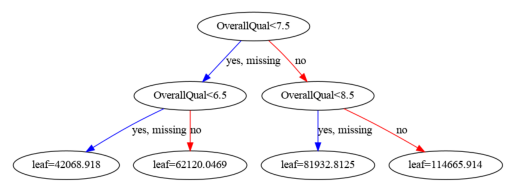

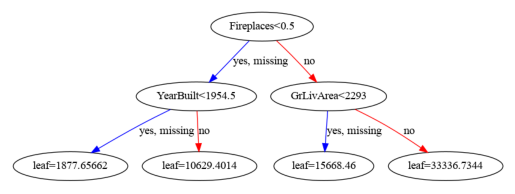

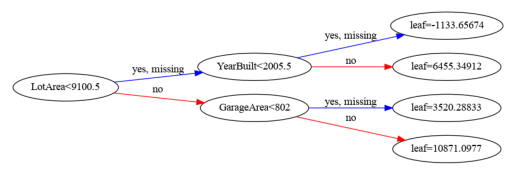

In [6]:
import matplotlib.pyplot as plt

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the first tree
xgb.plot_tree(xg_reg, num_trees=0)
plt.show()

# Plot the fifth tree
xgb.plot_tree(xg_reg, num_trees=4)
plt.show()

# Plot the last tree sideways
xgb.plot_tree(xg_reg, num_trees=9, rankdir='LR')
plt.show()

### Visualizing feature importances: What features are most important in my dataset

[12:51:51] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


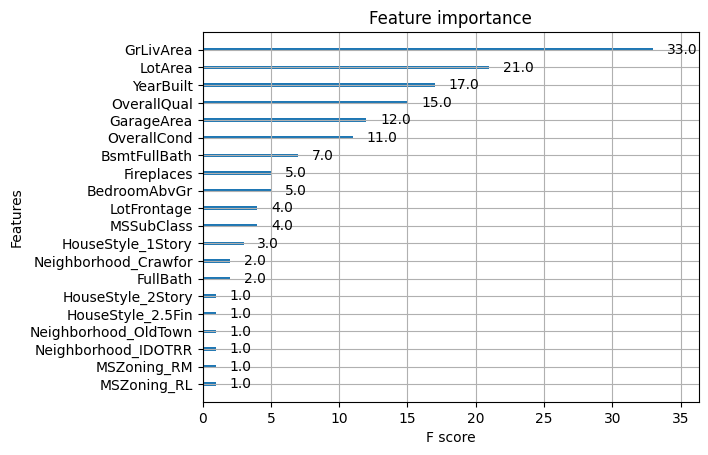

In [14]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {'objective':'reg:linear','max_depth':4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()

### Tuning Hyper-Parameters Example:

In [7]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary for each tree: params 
params = {"objective":"reg:linear", "max_depth":3}

# Create list of number of boosting rounds
num_rounds = [5, 10, 15]

# Empty list to store final round rmse per XGBoost model
final_rmse_per_round = []

# Iterate over num_rounds and build one model per num_boost_round parameter
for curr_num_rounds in num_rounds:

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=curr_num_rounds, metrics="rmse", as_pandas=True, seed=123)
    
    # Append final round RMSE
    final_rmse_per_round.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
num_rounds_rmses = list(zip(num_rounds, final_rmse_per_round))
print(pd.DataFrame(num_rounds_rmses,columns=["num_boosting_rounds","rmse"]))

[07:33:40] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[07:33:40] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[07:33:40] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[07:33:40] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[07:33:40] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[07:33:40] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[07:33:40] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[07:33:40] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[07:33:40] WARNING: ../src/objective/regression_

**Early stopping** works by testing the XGBoost model after every boosting round against a hold-out dataset and stopping the creation of additional boosting rounds (thereby finishing training of the model early) if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds. Here you will use the early_stopping_rounds parameter in xgb.cv() with a large possible number of boosting rounds (50). Bear in mind that if the holdout metric continuously improves up through when num_boost_rounds is reached, then early stopping does not occur.

In [8]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation with early stopping: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3,early_stopping_rounds=10, num_boost_round=50, as_pandas=True, seed=123, metric='rmse')

# Print cv_results
print(cv_results)

[07:38:00] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[07:38:00] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[07:38:00] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0     141871.635216      403.633062   142640.653507     705.559723
1     103057.033818       73.768079   104907.664683     111.117033
2      75975.967655      253.727043    79262.056654     563.766693
3      57420.530642      521.658273    61620.137859    1087.693428
4      44552.956483      544.170426    50437.560906    1846.446643
5      35763.948865      681.796675    43035.659539    2034.471115
6      29861.464164      769.571418    38600.880800    2169.796804
7      25994.675122      756.520639    36071.817710    2109.795408
8      23306.836299      759.237848    3

**Common tree tunable parameters**

- learning rate: learning rate/eta
- gamma: min loss reduction to create new tree split
- lambda: L2 reg on leaf weights
- alpha: L1 reg on leaf weights
- max_depth: max depth per tree
- subsample: % samples used per tree
- colsample_bytree: % features used per tree


In [9]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"reg:linear", "max_depth":3}

# Create list of eta values and empty list to store final round rmse per xgboost model
eta_vals = [0.001, 0.01, 0.1]
best_rmse = []

# Systematically vary the eta 
for curr_val in eta_vals:

    params["eta"] = curr_val
    
    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, metrics='rmse', nfold=3,early_stopping_rounds=5, num_boost_round=10, as_pandas=True, seed=123)
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(eta_vals, best_rmse)), columns=["eta","best_rmse"]))

[08:01:15] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[08:01:15] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[08:01:15] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[08:01:15] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[08:01:15] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[08:01:15] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[08:01:15] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[08:01:15] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[08:01:15] WARNING: ../src/objective/regression_

### Tuning Max Depth:

In [10]:
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params = {"objective":"reg:linear"}

# Create list of max_depth values
max_depths = [2,5,10,20]
best_rmse = []

# Systematically vary the max_depth
for curr_val in max_depths:

    params["max_depth"] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params,metrics='rmse',nfold=2,early_stopping_rounds=5, num_boost_round=10, as_pandas=True, seed=123)
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(max_depths, best_rmse)),columns=["max_depth","best_rmse"]))

[08:15:23] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:23] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:23] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:23] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:23] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:23] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:23] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[08:15:23] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
   max_depth     best_rmse
0          2  37957.4

### Tuning colsample_bytree:

In [11]:
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params={"objective":"reg:linear","max_depth":3}

# Create list of hyperparameter values: colsample_bytree_vals
colsample_bytree_vals = [0.1,0.5,0.8,1]
best_rmse = []

# Systematically vary the hyperparameter value 
for curr_val in colsample_bytree_vals:

    params['colsample_bytree'] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2,
                 num_boost_round=10, early_stopping_rounds=5,
                 metrics="rmse", as_pandas=True, seed=123)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(colsample_bytree_vals, best_rmse)), columns=["colsample_bytree","best_rmse"]))

[08:29:55] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[08:29:55] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[08:29:55] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[08:29:55] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[08:29:55] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[08:29:55] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[08:29:55] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[08:29:55] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
   colsample_bytree     best_rmse
0             

### Tune multiple hyper-parameters with GridSearch

In [13]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'n_estimators': [50],
    'max_depth': [2, 5]
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()

# Perform grid search: grid_mse
grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid,scoring='neg_mean_squared_error',cv=4,verbose=1)


# Fit grid_mse to the data
grid_mse.fit(X,y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 4 folds for each of 4 candidates, totalling 16 fits
Best parameters found:  {'colsample_bytree': 0.3, 'max_depth': 5, 'n_estimators': 50}
Lowest RMSE found:  29916.017850830365


### Tune multiple hyper-parameters with RandomSearch

In [16]:
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
    'n_estimators': [25],
    'max_depth': range(2, 12)
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(n_estimators=10)

# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(estimator=gbm, param_distributions=gbm_param_grid,scoring='neg_mean_squared_error',n_iter=5, cv=4, verbose=1)


# Fit randomized_mse to the data
randomized_mse.fit(X,y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

Fitting 4 folds for each of 5 candidates, totalling 20 fits
Best parameters found:  {'n_estimators': 25, 'max_depth': 4}
Lowest RMSE found:  29998.4522530019


### Encoding categorical columns I: LabelEncoder

```
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Fill missing values with 0
df.LotFrontage = df.LotFrontage.fillna(0)

# Create a boolean mask for categorical columns
categorical_mask = (df.dtypes == 'object')

# Get list of categorical column names
categorical_columns = df.columns[categorical_mask].tolist()

# Print the head of the categorical columns
print(df[categorical_columns].head())

# Create LabelEncoder object: le
le = LabelEncoder()

# Apply LabelEncoder to categorical columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: le.fit_transform(x))

# Print the head of the LabelEncoded categorical columns
print(df[categorical_columns].head())
```

Label Encoders applying categorical orders which may influence weights, another approach therefore is OneHot encoding.

### Encoding categorical columns II: OneHotEncoder

```
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Create OneHotEncoder: ohe
ohe = OneHotEncoder(sparse=False)

# Apply OneHotEncoder to categorical columns - output is no longer a dataframe: df_encoded
df_encoded = ohe.fit_transform(df)

# Print first 5 rows of the resulting dataset - again, this will no longer be a pandas dataframe
print(df_encoded[:5, :])

# Print the shape of the original DataFrame
print(df.shape)

# Print the shape of the transformed array
print(df_encoded.shape)

<script.py> output:
    [[0. 0. 0. ... 0. 0. 0.]
     [1. 0. 0. ... 0. 0. 0.]
     [0. 0. 0. ... 0. 0. 0.]
     [0. 0. 0. ... 0. 0. 0.]
     [0. 0. 0. ... 0. 0. 0.]]
    (1460, 21)
    (1460, 3369)
```

Using a DictVectorizer on a DataFrame that has been converted to a dictionary allows you to get label encoding as well as one-hot encoding in one go.

### Encoding categorical columns III: DictVectorizer

```
# Import DictVectorizer____
from sklearn.feature_extraction import DictVectorizer

# Convert df into a dictionary: df_dict
df_dict = df.to_dict('records')

# Create the DictVectorizer object: dv
dv = DictVectorizer(sparse=False)

# Apply dv on df: df_encoded
df_encoded = dv.fit_transform(df_dict)

# Print the resulting first five rows
print(df_encoded[:5,:])

# Print the vocabulary
print(dv.vocabulary_)

```

### Preprocessing within a pipeline

```
# Import necessary modules
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline

# Fill LotFrontage missing values with 0
X.LotFrontage = X.LotFrontage.fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor())]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Fit the pipeline
xgb_pipeline.fit(X.to_dict("records"),y)
```

### Cross-validating your XGBoost model

```
# Import necessary modules
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Fill LotFrontage missing values with 0
X.LotFrontage = X.LotFrontage.fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor(max_depth=2, objective="reg:linear"))]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Cross-validate the model
cross_val_scores = cross_val_score(xgb_pipeline, X.to_dict("records"), y, cv=10, scoring="neg_mean_squared_error")

# Print the 10-fold RMSE
print("10-fold RMSE: ", np.mean(np.sqrt(np.abs(cross_val_scores))))

```

### Kidney disease case study I: Categorical Imputer

The chronic kidney disease dataset contains both categorical and numeric features, but contains lots of missing values. The goal here is to predict who has chronic kidney disease given various blood indicators as features.

```
# Import necessary modules
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer

# Check number of nulls in each feature column
nulls_per_column = X.isnull().sum()
print(nulls_per_column)

# Create a boolean mask for categorical columns
categorical_feature_mask = X.dtypes == object

# Get list of categorical column names
categorical_columns = X.columns[categorical_feature_mask].tolist()

# Get list of non-categorical column names
non_categorical_columns = X.columns[~categorical_feature_mask].tolist()

# Apply numeric imputer
numeric_imputation_mapper = DataFrameMapper(
                                            [([numeric_feature], SimpleImputer(strategy="median")) for numeric_feature in non_categorical_columns],
                                            input_df=True,
                                            df_out=True
                                           )

# Apply categorical imputer
categorical_imputation_mapper = DataFrameMapper(
                                                [(category_feature, SimpleImputer()) for category_feature in non_categorical_columns],
                                                input_df=True,
                                                df_out=True
                                               )
                                              
<script.py> output:
    age        9
    bp        12
    sg        47
    al        46
    su        49
    bgr       44
    bu        19
    sc        17
    sod       87
    pot       88
    hemo      52
    pcv       71
    wc       106
    rc       131
    rbc      152
    pc        65
    pcc        4
    ba         4
    htn        2
    dm         2
    cad        2
    appet      1
    pe         1
    ane        1
    dtype: int64
    
    
# Import FeatureUnion
from sklearn.pipeline import FeatureUnion

# Combine the numeric and categorical transformations
numeric_categorical_union = FeatureUnion([
                                          ("num_mapper", numeric_imputation_mapper),
                                          ("cat_mapper", categorical_imputation_mapper)
                                         ])
                                         
                                         
# Create full pipeline
pipeline = Pipeline([
                     ("featureunion", numeric_categorical_union),
                     ("dictifier", Dictifier()),
                     ("vectorizer", DictVectorizer(sort=False)),
                     ("clf", xgb.XGBClassifier(max_depth=3))
                    ])

# Perform cross-validation
cross_val_scores = cross_val_score(pipeline, kidney_data, y, scoring="roc_auc", cv=3)

# Print avg. AUC
print("3-fold AUC: ", np.mean(cross_val_scores))


3-fold AUC:  0.998237712755785
```

### Bringing it all together

```
# Create the parameter grid
gbm_param_grid = {
    'clf__learning_rate': np.arange(0.05, 1, 0.05),
    'clf__max_depth': np.arange(3, 10, 1),
    'clf__n_estimators': np.arange(50, 200, 50)
}

# Perform RandomizedSearchCV
randomized_roc_auc = RandomizedSearchCV(
estimator=pipeline,
n_iter=2,
scoring='roc_auc',
cv=2,
verbose=1,
param_distributions=gbm_param_grid)

# Fit the estimator
randomized_roc_auc.fit(X,y)

# Compute metrics
print(randomized_roc_auc.best_score_)
print(randomized_roc_auc.best_estimator_)
```